In [116]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('../utils')))


In [117]:
from image_generator import ImageGenerater
from image_composer import ImageComposer


In [118]:
'''images = {
          'Interactive Elements':'../8968a702d64524827de2ccf55c802d6c/landing_1.jpg', 
          'thumbnail':'../8968a702d64524827de2ccf55c802d6c/thumbnail.jpg', 
          'engagement_instruction':'../8968a702d64524827de2ccf55c802d6c/engagement_instruction.png',
          'Product Image':'../8968a702d64524827de2ccf55c802d6c/advertised_item.png', 
          'Animation':'../8968a702d64524827de2ccf55c802d6c/engagement_animation.png', 
          'background_index':'../8968a702d64524827de2ccf55c802d6c/landing_2.jpg',
        }  # Replace with actual image file paths
'''

"images = {\n          'Interactive Elements':'../8968a702d64524827de2ccf55c802d6c/landing_1.jpg', \n          'thumbnail':'../8968a702d64524827de2ccf55c802d6c/thumbnail.jpg', \n          'engagement_instruction':'../8968a702d64524827de2ccf55c802d6c/engagement_instruction.png',\n          'Product Image':'../8968a702d64524827de2ccf55c802d6c/advertised_item.png', \n          'Animation':'../8968a702d64524827de2ccf55c802d6c/engagement_animation.png', \n          'background_index':'../8968a702d64524827de2ccf55c802d6c/landing_2.jpg',\n        }  # Replace with actual image file paths\n"

In [119]:
ic = ImageComposer(320, 500, [[('background_index','../8968a702d64524827de2ccf55c802d6c/landing_1.jpg'),
                               ('CTA Button','../8968a702d64524827de2ccf55c802d6c/engagement_instruction.png'), 
                                ('Icon','../8968a702d64524827de2ccf55c802d6c/engagement_animation.png'),
                                ('Product Image','../8968a702d64524827de2ccf55c802d6c/advertised_item.png'),
                                ('Text Elements','../8968a702d64524827de2ccf55c802d6c/fr-2-copy-ny.png'), 
                                #('background_index','../8968a702d64524827de2ccf55c802d6c/landing_2.jpg'),
]])


In [120]:
possibilties = ImageComposer.compute_positions(["Logo", "CTA Button", "Icon", "Product Image", "Text Elements"])

In [121]:
diverse = ImageComposer.select_diverse_positions(possibilties)
print(diverse)

[(1, 1), (2, 3), (3, 1), (2, 1), (1, 1)]


In [122]:
print(ic.calculate_adjusted_element_positions(diverse))

[{'start_point': (10, 10.0), 'dimensions': (44.0, 40.0)}, {'start_point': (10, 50.0), 'dimensions': (44.0, 40.0)}, {'start_point': (266.0, 110.0), 'dimensions': (44.0, 280.0)}, {'start_point': (10, 410.0), 'dimensions': (44.0, 80.0)}, {'start_point': (10, 110.0), 'dimensions': (44.0, 280.0)}]


In [123]:
#generated_frames = ic.generate_frames()

In [124]:

from PIL import Image

def compose_vertical_image(header_image_path, logo_image_path, thumbnail_image_path, output_image_path):
    # Load images
    header_image = Image.open(header_image_path).convert("RGBA")
    logo_image = Image.open(logo_image_path).convert("RGBA")
    thumbnail_image = Image.open(thumbnail_image_path).convert("RGBA")
    
    # Resize images while maintaining aspect ratio
    max_width = max(header_image.width, logo_image.width, thumbnail_image.width)
    max_height = header_image.height + logo_image.height + thumbnail_image.height
    
    header_image = resize_image(header_image, max_width, header_image.height)
    logo_image = resize_image(logo_image, max_width, logo_image.height)
    thumbnail_image = resize_image(thumbnail_image, max_width, thumbnail_image.height)
    
    # Calculate centering for header within logo
    header_center_x = (logo_image.width - header_image.width) // 4
    header_center_y = (logo_image.height - header_image.height) // 1
    
    # Paste header image into logo image
    logo_image.paste(header_image, (header_center_x, header_center_y), mask=header_image)
    
    # Create a new image with the calculated dimensions
    composed_image = Image.new('RGBA', (max_width, max_height), color=(255, 255, 255, 0))
    
    # Paste logo image onto the composed image
    composed_image.paste(logo_image, (0, 0), mask=logo_image)
    
    # Paste thumbnail image below logo image
    logo_y_offset = logo_image.height
    composed_image.paste(thumbnail_image, (0, logo_y_offset), mask=thumbnail_image)
    
    # Save composed image
    composed_image.save(output_image_path)
    print(f"Composed image saved at {output_image_path}")
    
    display(composed_image)

def resize_image(image, target_width, target_height):
    """
    Resize an image while maintaining aspect ratio.
    """
    width_ratio = target_width / image.width
    height_ratio = target_height / image.height
    resize_ratio = min(width_ratio, height_ratio)
    
    new_width = int(image.width * resize_ratio)
    new_height = int(image.height * resize_ratio)
    
    return image.resize((new_width, new_height), Image.LANCZOS)


Frame 1

Composed image saved at composed_image1.png


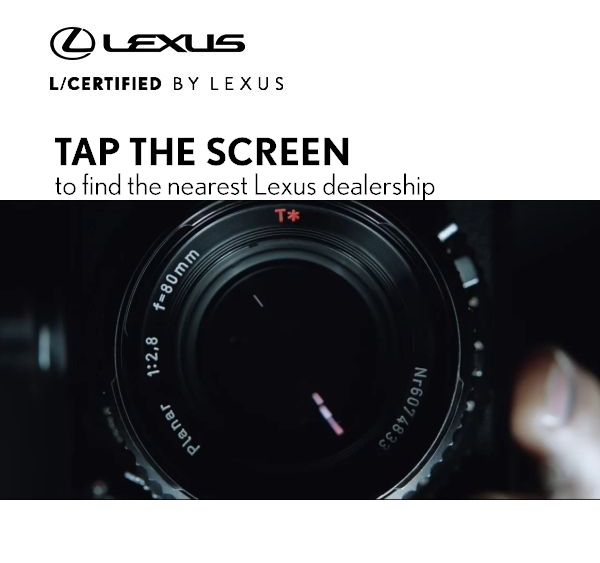

In [126]:

header_image_path = '../8968a702d64524827de2ccf55c802d6c/engagement_instruction.png'  # Replace with your header image path
logo_image_path = '../8968a702d64524827de2ccf55c802d6c/landing_1.jpg'  # Replace with your logo image path
thumbnail_image_path = '../8968a702d64524827de2ccf55c802d6c/thumbnail.jpg'  # Replace with your thumbnail image path
output_image_path = "composed_image1.png"  # Replace with desired output image path

compose_vertical_image(header_image_path, logo_image_path, thumbnail_image_path, output_image_path)


Frame 2

Composed image saved at composed_image2.png


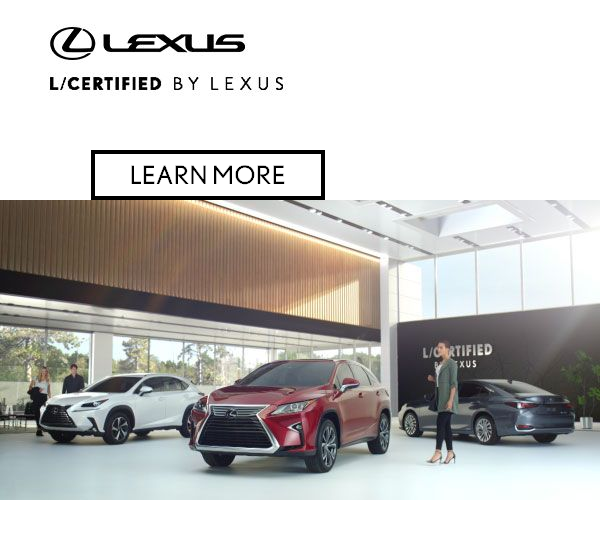

In [127]:
header_image_path = '../8968a702d64524827de2ccf55c802d6c/end-cta.png'  # Replace with your header image path
logo_image_path = '../8968a702d64524827de2ccf55c802d6c/landing_1.jpg'  # Replace with your logo image path
thumbnail_image_path = '../8968a702d64524827de2ccf55c802d6c/landing_2.jpg'  # Replace with your thumbnail image path
output_image_path = "composed_image2.png"  # Replace with desired output image path

compose_vertical_image(header_image_path, logo_image_path, thumbnail_image_path, output_image_path)
